## Exploring the Pre-trained model

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
pre_trained_model = tf.keras.applications.VGG16(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = None)

In [4]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
last_layer = pre_trained_model.get_layer('block5_conv3')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 512)


## Adding custom layers

In [6]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
# Adding a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
x = layers.Dense (13, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Getting the dataset ready

In [7]:
# Defining the directories where the images are present
base_dir='/content/drive/My Drive/Face-Recognition/jay/dataset'

# Directory with the training and testing examples
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

## Building the model

In [8]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [9]:
# Adding data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)

validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

validation_generator =  validation_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 2525 images belonging to 13 classes.
Found 1101 images belonging to 13 classes.


## Training

In [10]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = len(train_dir)//32,
            epochs = 200,
            validation_steps = len(validation_dir)//32,
            verbose = 1)

Epoch 1/200
1/1 [==============================] - 32s 32s/step - loss: 2.5649 - accuracy: 0.1250 - val_loss: 2.5491 - val_accuracy: 0.1250
Epoch 2/200
1/1 [==============================] - 30s 30s/step - loss: 2.5986 - accuracy: 0.0312 - val_loss: 2.5646 - val_accuracy: 0.0625
Epoch 3/200
1/1 [==============================] - 28s 28s/step - loss: 2.5632 - accuracy: 0.1875 - val_loss: 2.5459 - val_accuracy: 0.1875
Epoch 4/200
1/1 [==============================] - 25s 25s/step - loss: 2.5485 - accuracy: 0.1562 - val_loss: 2.7785 - val_accuracy: 0.1250
Epoch 5/200
1/1 [==============================] - 23s 23s/step - loss: 2.9063 - accuracy: 0.1250 - val_loss: 2.5566 - val_accuracy: 0.1562
Epoch 6/200
1/1 [==============================] - 21s 21s/step - loss: 2.5629 - accuracy: 0.0000e+00 - val_loss: 2.5586 - val_accuracy: 0.0625
Epoch 7/200
1/1 [==============================] - 19s 19s/step - loss: 2.5598 - accuracy: 0.1562 - val_loss: 2.5606 - val_accuracy: 0.0625
Epoch 8/200
1/1 

## Evaluating Accuracy and Loss for the Model

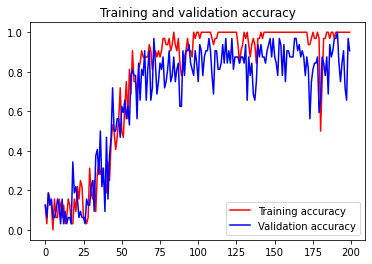

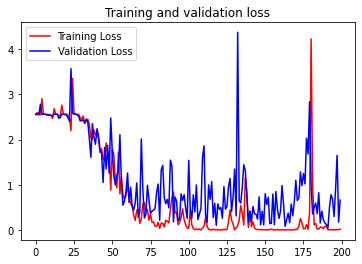

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing

In [12]:
l_ = []
for f in os.listdir('/content/drive/My Drive/Face-Recognition/jay/dataset/train'):
    l_.append(f.upper())

l_ = sorted(l_)
people = {}
for i,person in enumerate(l_):
    people[i] = person.title()
people

{0: 'Garima',
 1: 'Jay',
 2: 'Jetz',
 3: 'Mam1',
 4: 'Mam2',
 5: 'Mam3',
 6: 'Mam4',
 7: 'Mam5',
 8: 'Mehboob',
 9: 'Mohan',
 10: 'Person1',
 11: 'Sachin',
 12: 'Shivani'}

Using TensorFlow backend.


Saving 7.jpg to 7.jpg
Saving 25.jpg to 25.jpg
Saving 105.jpg to 105.jpg
Saving 107.jpg to 107.jpg
Saving 108.jpg to 108.jpg
Saving 111.jpg to 111.jpg
Saving 112.jpg to 112.jpg
Saving 113.jpg to 113.jpg
Saving 114.jpg to 114.jpg
Saving 122.jpg to 122.jpg
Saving 204.jpg to 204.jpg
Saving 391e.jpg to 391e.jpg


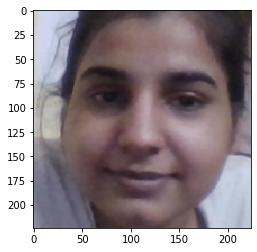

7.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
shivani


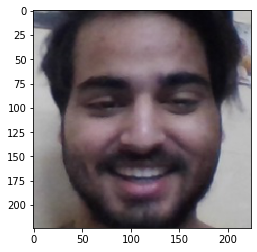

25.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
mohan


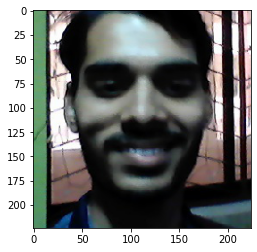

105.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
person1


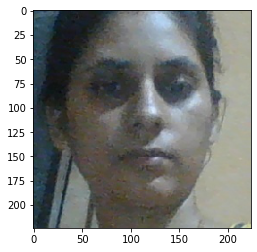

107.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
garima


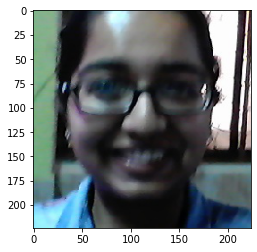

108.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
mam3


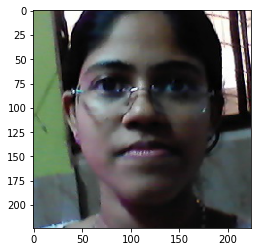

111.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
mam2


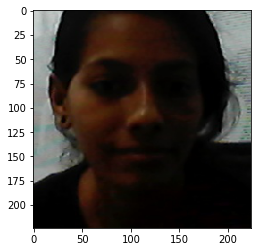

112.jpg
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
jetz


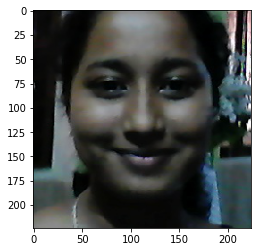

113.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
mam4


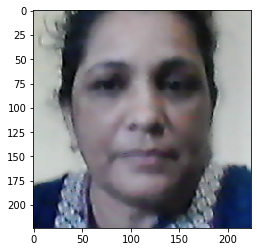

114.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
mam5


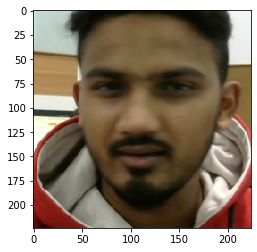

122.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
mehboob


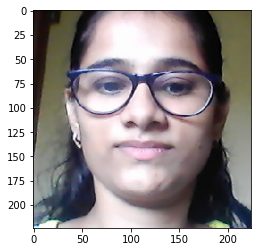

204.jpg
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
mam1


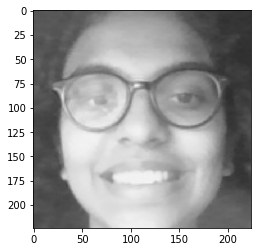

391e.jpg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
jay


In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

 
  plt.imshow(img)

  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

  for i in classes:
    if classes[0][0]==max(classes[0]):
      print('garima')
    elif classes[0][1]==max(classes[0]):
      print('jay')
    elif classes[0][2]==max(classes[0]):
      print('jetz')
    elif classes[0][3]==max(classes[0]):
      print('mam1')
    elif classes[0][4]==max(classes[0]):
      print('mam2')
    elif classes[0][5]==max(classes[0]):
      print('mam3')
    elif classes[0][6]==max(classes[0]):
      print('mam4')
    elif classes[0][7]==max(classes[0]):
      print('mam5')
    elif classes[0][8]==max(classes[0]):
      print('mehboob')
    elif classes[0][9]==max(classes[0]):
      print('mohan')    
    elif classes[0][10]==max(classes[0]):
      print('person1')    
    elif classes[0][11]==max(classes[0]):
      print('sachin')
    else:
      print('shivani')

  #if classes[0][0]==1:
    #print('jay')
  #elif classes[0][1]==1:
    #print('shivani')
  #else:
    #print('mohan')


## Saving the model

In [14]:
model.save('vgg16.h5')

In [ ]:
# serialize model to JSON
model_json=model.to_json()
with open("vgg16_model.json","w") as json_file:
  json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("vgg16_model.h5")
print("Saved model to disk")

In [ ]:
# !pip install pickle-mixin

weigh= loaded_model.get_weights(); 
pklfile= "model.pkl"
fpkl= open(pklfile, 'wb')    #Python 3     
pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
fpkl.close()